In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 60)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['font.size'] = 20
from IPython.core.pylabtools import figsize
from sklearn.model_selection import train_test_split

# Imputing missing values and scaling values
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Performance of Models
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

**Data Cleaning**

We were given to sets of data so we merge them so we can make use of all our variables

In [2]:
train = pd.read_csv('https://raw.githubusercontent.com/Valaska/Team_3_JHB/master/regression_dataset/Train.csv')
riders = pd.read_csv('https://raw.githubusercontent.com/Valaska/Team_3_JHB/master/regression_dataset/Riders.csv')
test = pd.read_csv('https://raw.githubusercontent.com/Valaska/Team_3_JHB/master/regression_dataset/Test.csv')
train_data = pd.merge(train, riders, how='inner', on='Rider Id')
test_data = pd.merge(test, riders, how = 'inner', on= 'Rider Id')

In [3]:
train_copy = train_data.copy()
test_copy = test_data.copy()

In [4]:
train_data.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,1637,1309,13.8,549
1,Order_No_27440,User_Id_2642,Bike,3,Personal,18,5,3:41:17 PM,18,5,3:41:30 PM,18,5,4:07:16 PM,18,5,4:13:37 PM,18,5,5:01:43 PM,20,24.5,NaN,-1.326774,36.787807,-1.356237,36.904295,Rider_Id_432,2886,1637,1309,13.8,549
2,Order_No_14170,User_Id_3339,Bike,3,Business,31,5,12:51:41 PM,31,5,1:12:49 PM,31,5,1:20:02 PM,31,5,1:33:08 PM,31,5,2:16:43 PM,6,24.7,NaN,-1.255189,36.782203,-1.273412,36.818206,Rider_Id_432,2615,1637,1309,13.8,549
3,Order_No_21727,User_Id_3523,Bike,3,Personal,2,2,7:12:10 AM,2,2,7:12:29 AM,2,2,7:35:24 AM,2,2,7:38:46 AM,2,2,8:28:32 AM,18,15.2,NaN,-1.290315,36.757377,-1.223520,36.802061,Rider_Id_432,2986,1637,1309,13.8,549
4,Order_No_8301,User_Id_87,Bike,2,Personal,22,2,10:40:58 AM,22,2,10:42:24 AM,22,2,10:56:00 AM,22,2,10:59:40 AM,22,2,11:26:22 AM,7,19.2,NaN,-1.273524,36.799220,-1.300431,36.752427,Rider_Id_432,1602,1637,1309,13.8,549


Initials thought on our data?


**Data types**

In [5]:
train_data.columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Precipitation in millimeters', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id',
       'Time from Pickup to Arrival', 'No_Of_Orders', 'Age', 'Average_Rating',
       'No_of_Ratings'],
      dtype='object')

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21201 entries, 0 to 21200
Data columns (total 33 columns):
Order No                                     21201 non-null object
User Id                                      21201 non-null object
Vehicle Type                                 21201 non-null object
Platform Type                                21201 non-null int64
Personal or Business                         21201 non-null object
Placement - Day of Month                     21201 non-null int64
Placement - Weekday (Mo = 1)                 21201 non-null int64
Placement - Time                             21201 non-null object
Confirmation - Day of Month                  21201 non-null int64
Confirmation - Weekday (Mo = 1)              21201 non-null int64
Confirmation - Time                          21201 non-null object
Arrival at Pickup - Day of Month             21201 non-null int64
Arrival at Pickup - Weekday (Mo = 1)         21201 non-null int64
Arrival at Pickup - Time   

Missing values in our dataset

In [7]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [8]:
missing_values_table(train_data)

Your selected dataframe has 33 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
Precipitation in millimeters,20649,97.4
Temperature,4366,20.6


As we can see from the above table there are two columns with missing values. Temperature has 20.6 % missing values which is not
enough reason to drop the column so we instead replace the missing values with the mean value of the temperatures.
For the Percipitation in millimeters it is clear that majority of the values are missing although due to the lack of information
we are making an assumption that if there was a missing value that no rain occured that day and would like to test the influence
this variable with have on our target value.




Replace NaN values in Precipitation in millimeters column with O

In [9]:
train_data['Precipitation in millimeters'].fillna(value=0, inplace=True)
test_data['Precipitation in millimeters'].fillna(value=0, inplace=True)

Replace missing values in the Temperature column with the average temperature

In [10]:
from sklearn.impute import SimpleImputer

from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')


imputer.fit(train_data[["Temperature"]])
train_data["Temperature"]=imputer.transform(train_data[["Temperature"]]).ravel()
test_data["Temperature"]=imputer.transform(test_data[["Temperature"]]).ravel()


Change our time data to 24 hours

In [11]:
 def change_time(df, col):
    
    df['timestampx'] = pd.to_datetime(df[col], format='%I:%M:%S %p')
        
    a = []
    for i in df['timestampx']:
        a.append(i.time().strftime('%H:%M:%S'))
    df[col] = pd.DataFrame(a)
    df.drop('timestampx', axis = 1, inplace = True)
    
    return df


In [12]:
change_time(train_data, 'Placement - Time')
change_time(train_data, 'Confirmation - Time')
change_time(train_data, 'Arrival at Destination - Time')
change_time(train_data, 'Pickup - Time')
change_time(train_data, 'Arrival at Pickup - Time')
change_time(test_data, 'Arrival at Pickup - Time')
change_time(test_data, 'Placement - Time')
change_time(test_data, 'Confirmation - Time')
change_time(test_data, 'Pickup - Time')

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,16:44:10,27,3,16:44:29,27,3,16:53:04,27,3,17:06:47,8,23.258889,0.0,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192,439,1511,13.3,171
1,Order_No_2699,User_Id_592,Bike,1,Personal,26,2,14:43:21,26,2,14:47:16,26,2,15:09:26,26,2,15:17:48,19,23.258889,0.0,-1.312745,36.875715,-1.288435,36.760677,Rider_Id_192,439,1511,13.3,171
2,Order_No_21486,User_Id_478,Bike,3,Business,29,5,11:55:05,29,5,11:58:12,29,5,12:25:49,29,5,12:28:54,9,19.700000,0.0,-1.255189,36.782203,-1.293393,36.790237,Rider_Id_192,439,1511,13.3,171
3,Order_No_19336,User_Id_2801,Bike,3,Business,2,1,09:23:21,2,1,09:23:44,2,1,09:44:50,2,1,10:05:31,15,16.400000,0.0,-1.310451,36.868724,-1.259542,36.787118,Rider_Id_192,439,1511,13.3,171
4,Order_No_20374,User_Id_3465,Bike,3,Business,14,4,12:55:59,14,4,13:22:44,14,4,13:49:38,14,4,13:51:49,15,21.300000,0.0,-1.333275,36.870815,-1.255189,36.782203,Rider_Id_192,439,1511,13.3,171
5,Order_No_9830,User_Id_1926,Bike,3,Business,30,4,12:39:17,30,4,12:40:17,30,4,13:04:53,30,4,13:19:38,7,20.300000,0.0,-1.333275,36.870815,-1.331806,36.835960,Rider_Id_192,439,1511,13.3,171
6,Order_No_17505,User_Id_978,Bike,1,Personal,11,1,15:26:33,11,1,15:27:47,11,1,15:38:18,11,1,15:47:57,7,23.000000,0.0,-1.308407,36.834501,-1.332454,36.883519,Rider_Id_192,439,1511,13.3,171
7,Order_No_23802,User_Id_2445,Bike,2,Personal,17,4,12:58:47,17,4,12:58:55,17,4,13:31:18,17,4,13:36:40,16,24.100000,0.0,-1.332840,36.889117,-1.263920,36.806930,Rider_Id_192,439,1511,13.3,171
8,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35,17,5,12:59:17,17,5,13:20:27,17,5,13:25:37,5,23.258889,0.0,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868,488,273,14.4,45
9,Order_No_6400,User_Id_299,Bike,3,Business,3,1,10:38:31,3,1,10:38:46,3,1,10:43:18,3,1,10:54:09,15,21.500000,0.0,-1.262864,36.807040,-1.346562,36.767784,Rider_Id_868,488,273,14.4,45


**Exploratory Data Analysis**

In [13]:
train_data.shape

(21201, 33)

In [14]:
train_data.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,2.752182,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,9.506533,23.258889,0.205839,-1.281470,36.811264,-1.282581,36.811220,1556.920947,1692.423706,984.742842,13.882520,341.067119
std,0.625178,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,5.668963,3.222006,3.029194,0.030507,0.037473,0.034824,0.044721,987.270788,1574.308302,646.652835,0.916071,402.867746
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.200000,0.000000,-1.438302,36.653621,-1.430298,36.606594,1.000000,2.000000,96.000000,0.000000,0.000000
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,21.400000,0.000000,-1.300921,36.784605,-1.301201,36.785661,882.000000,557.000000,495.000000,13.600000,61.000000
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.258889,0.000000,-1.279395,36.807040,-1.284382,36.808002,1369.000000,1212.000000,872.000000,14.000000,161.000000
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,25.300000,0.000000,-1.257147,36.829741,-1.261177,36.829477,2040.000000,2311.000000,1236.000000,14.300000,495.000000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,32.100000,99.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000,9756.000000,3764.000000,15.200000,2298.000000


Lets look at the distribution of our target variable 'Time from Pickup to Arrival'

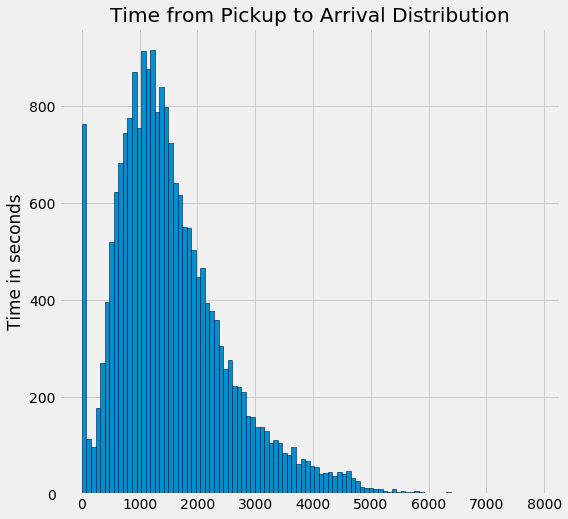

In [15]:
figsize(8, 8)

# Rename the score 
#df = train_data.rename(columns = {'ENERGY STAR Score': 'score'})

# Histogram of the Energy Star Score
plt.style.use('fivethirtyeight')
plt.hist(train_data['Time from Pickup to Arrival'].dropna(), bins = 100, edgecolor = 'k');
plt.xlabel(''); plt.ylabel('Time in seconds'); 
plt.title('Time from Pickup to Arrival Distribution');

In [16]:
def min_max_values(col):
    ''' This function takes the column name as the argument and returns
    the top and bottom observation in that argument 
    '''
    top = train_data[col].idxmax()
    top_obs = pd.DataFrame(train_data.loc[top])
    
    bottom = train_data[col].idxmin()
    bot_obs = pd.DataFrame(train_data.loc[bottom])
    
    min_max_obs = pd.concat([top_obs, bot_obs], axis = 1)
    
    return min_max_obs

In [17]:
min_max_values('Time from Pickup to Arrival')

,10585,1911
Order No,Order_No_5837,Order_No_4785
User Id,User_Id_658,User_Id_393
Vehicle Type,Bike,Bike
Platform Type,2,3
Personal or Business,Personal,Business
Placement - Day of Month,30,23
Placement - Weekday (Mo = 1),1,3
Placement - Time,10:07:30,10:49:47
Confirmation - Day of Month,30,23
Confirmation - Weekday (Mo = 1),1,3


In [18]:
train_num_floats = train_data.select_dtypes(include =['float64'])
train_num_floats.head()

,Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Average_Rating
0,20.4,0.0,-1.317755,36.830370,-1.300406,36.829741,13.8
1,24.5,0.0,-1.326774,36.787807,-1.356237,36.904295,13.8
2,24.7,0.0,-1.255189,36.782203,-1.273412,36.818206,13.8
3,15.2,0.0,-1.290315,36.757377,-1.223520,36.802061,13.8
4,19.2,0.0,-1.273524,36.799220,-1.300431,36.752427,13.8


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E811C30C18>,
      dtype=object)

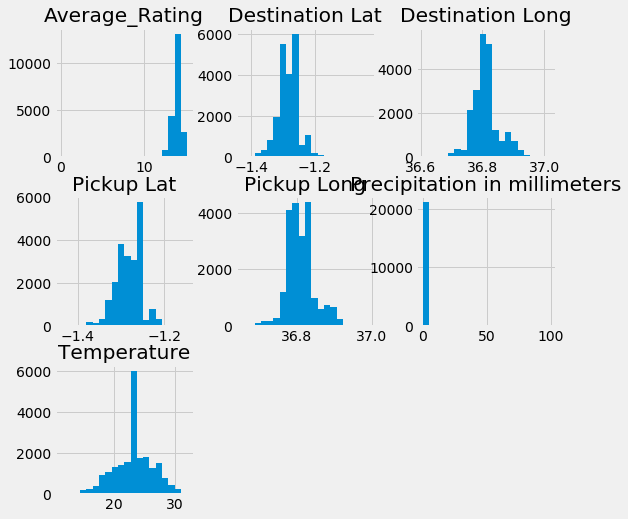

In [19]:
train_num_floats.hist(bins = 20)

In [20]:
train_num = train_data.select_dtypes(include =['float64', 'int64'])

In [21]:
train_corr = train_num.corr()['Time from Pickup to Arrival'][:-1]

In [22]:
train_corr

Platform Type                               -0.003827
Placement - Day of Month                    -0.014710
Placement - Weekday (Mo = 1)                 0.009693
Confirmation - Day of Month                 -0.014701
Confirmation - Weekday (Mo = 1)              0.009744
Arrival at Pickup - Day of Month            -0.014701
Arrival at Pickup - Weekday (Mo = 1)         0.009744
Pickup - Day of Month                       -0.014701
Pickup - Weekday (Mo = 1)                    0.009744
Arrival at Destination - Day of Month       -0.014701
Arrival at Destination - Weekday (Mo = 1)    0.009744
Distance (KM)                                0.580608
Temperature                                  0.005772
Precipitation in millimeters                 0.005495
Pickup Lat                                  -0.053823
Pickup Long                                  0.060285
Destination Lat                             -0.061872
Destination Long                             0.070425
Time from Pickup to Arrival 

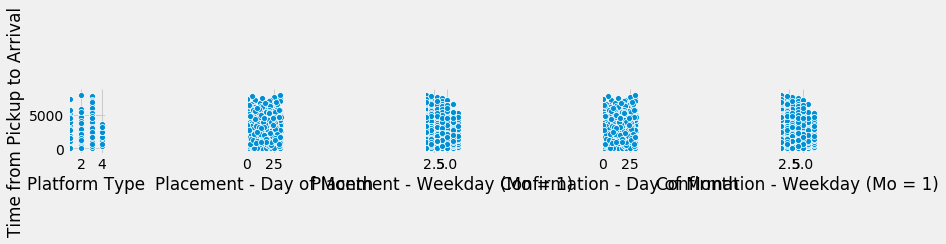

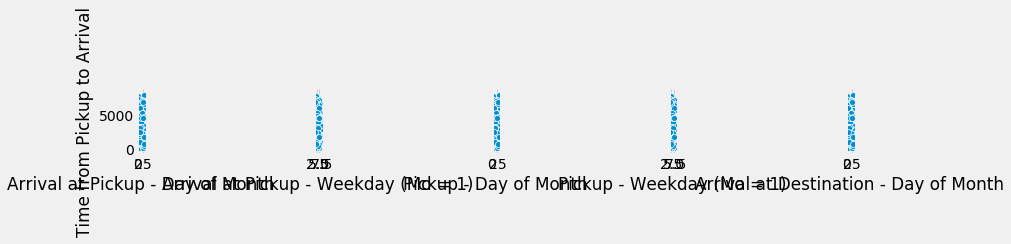

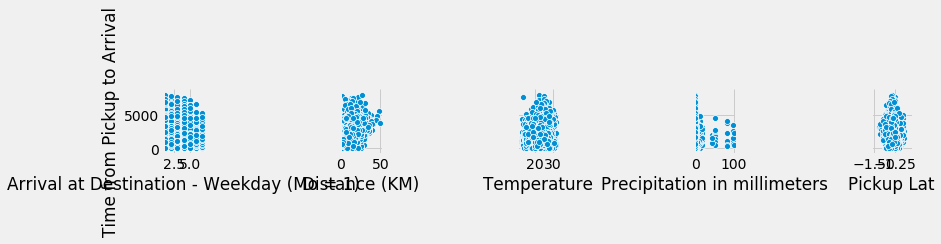

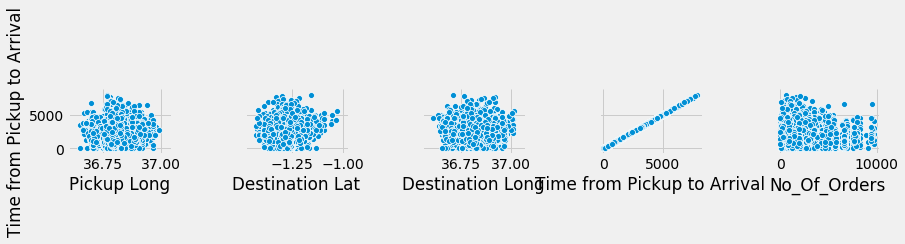

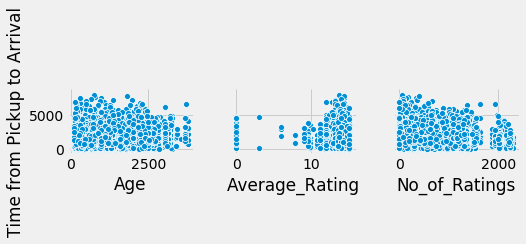

In [23]:
#correlation plots using pairplots
for i in range(0, len(train_num.columns),5):
    sns.pairplot(train_num, y_vars=['Time from Pickup to Arrival'],x_vars=train_num.columns[i:i+5])

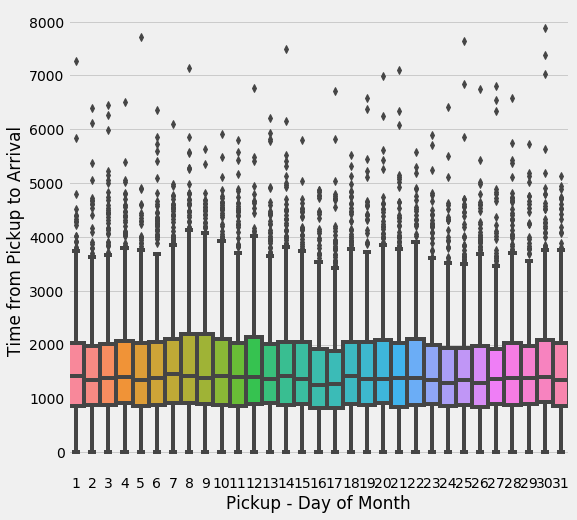

In [24]:
#box-plot (categorical variables)

box1 = sns.boxplot(x='Pickup - Day of Month', y='Time from Pickup to Arrival', data=train, saturation=10, width=1)

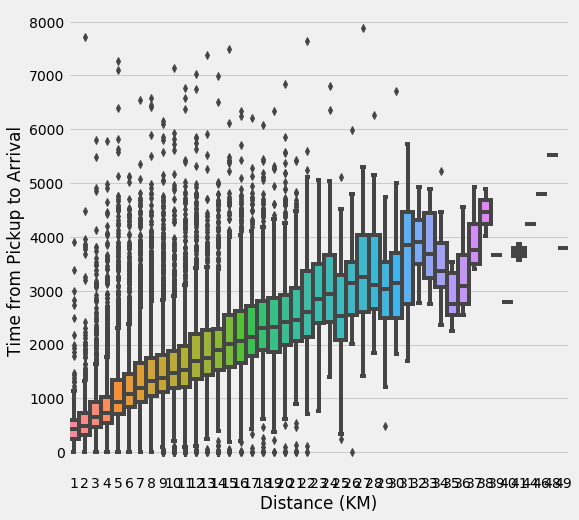

In [25]:
#box-plot (categorical variables)

box2 = sns.boxplot(x='Distance (KM)', y='Time from Pickup to Arrival', data=train, saturation=10, width=1)

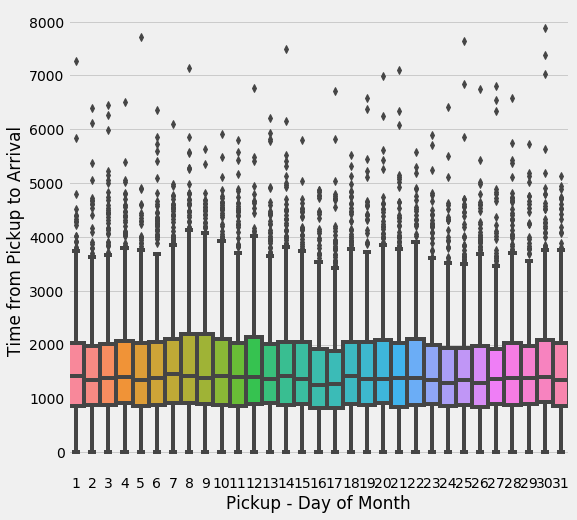

In [26]:
#box-plot (categorical variables)

box3 = sns.boxplot(x='Pickup - Day of Month', y='Time from Pickup to Arrival', data=train, saturation=10, width=1)

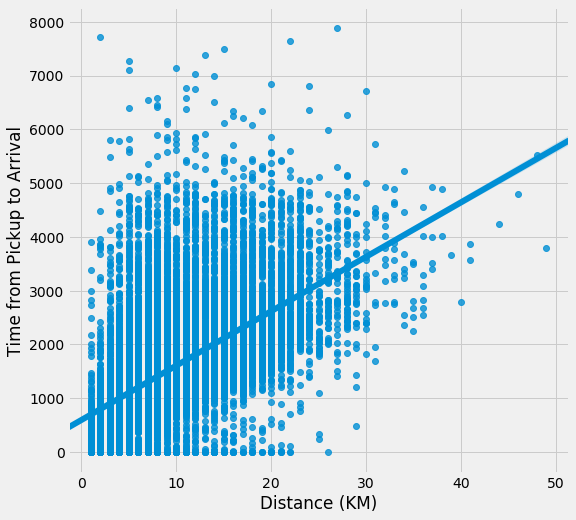

In [27]:
#Regression Plot

sns.regplot(train_num['Distance (KM)'], train_num['Time from Pickup to Arrival'])

Feature engineering and feature selection

Change all cyclical data columns, Time, Weekday and day of month

In [28]:
#Change time to float
train_data['Placement - Time'] = pd.to_timedelta(train_data['Placement - Time'])
train_data['Placement - Time'] = train_data['Placement - Time'] / pd.offsets.Minute(60)
train_data['Confirmation - Time'] = pd.to_timedelta(train_data['Confirmation - Time'])
train_data['Confirmation - Time'] = train_data['Confirmation - Time'] / pd.offsets.Minute(60)
train_data['Arrival at Destination - Time'] = pd.to_timedelta(train_data['Arrival at Destination - Time'])
train_data['Arrival at Destination - Time'] = train_data['Arrival at Destination - Time'] / pd.offsets.Minute(60)
train_data['Pickup - Time'] = pd.to_timedelta(train_data['Pickup - Time'])
train_data['Pickup - Time'] = train_data['Pickup - Time'] / pd.offsets.Minute(60)
train_data['Arrival at Pickup - Time'] = pd.to_timedelta(train_data['Arrival at Pickup - Time'])
train_data['Arrival at Pickup - Time'] = train_data['Arrival at Pickup - Time'] / pd.offsets.Minute(60)
test_data['Arrival at Pickup - Time'] = pd.to_timedelta(test_data['Arrival at Pickup - Time'])
test_data['Arrival at Pickup - Time'] = test_data['Arrival at Pickup - Time'] / pd.offsets.Minute(60)
test_data['Placement - Time'] = pd.to_timedelta(test_data['Placement - Time'])
test_data['Placement - Time'] = test_data['Placement - Time'] / pd.offsets.Minute(60)
test_data['Confirmation - Time'] = pd.to_timedelta(test_data['Confirmation - Time'])
test_data['Confirmation - Time'] = test_data['Confirmation - Time'] / pd.offsets.Minute(60)
test_data['Pickup - Time'] = pd.to_timedelta(test_data['Pickup - Time'])
test_data['Pickup - Time'] = test_data['Pickup - Time'] / pd.offsets.Minute(60)

In [29]:
#Change time to x,y to rightfully reflect a cycle form
train_data['Placement_time_x']=np.sin(2.*np.pi*train_data['Placement - Time']/24.)
train_data['Placement_time_y']=np.cos(2.*np.pi*train_data['Placement - Time']/24.)
train_data['Confirmation - time_x']=np.sin(2.*np.pi*train_data['Confirmation - Time']/24.)
train_data['Confirmation - time_y']=np.cos(2.*np.pi*train_data['Confirmation - Time']/24.)
train_data['Arrival at Destination - time_x']=np.sin(2.*np.pi*train_data['Arrival at Destination - Time']/24.)
train_data['Arrival at Destination - time_y']=np.cos(2.*np.pi*train_data['Arrival at Destination - Time']/24.)
train_data['Pickup - time_x']=np.sin(2.*np.pi*train_data['Pickup - Time']/24.)
train_data['Pickup - time_y']=np.cos(2.*np.pi*train_data['Pickup - Time']/24.)
train_data['Arrival at Pickup - time_x']=np.sin(2.*np.pi*train_data['Arrival at Pickup - Time']/24.)
train_data['Arrival at Pickup - time_y']=np.cos(2.*np.pi*train_data['Arrival at Pickup - Time']/24.)
test_data['Arrival at Pickup - time_x']=np.sin(2.*np.pi*test_data['Arrival at Pickup - Time']/24.)
test_data['Arrival at Pickup - time_y']=np.cos(2.*np.pi*test_data['Arrival at Pickup - Time']/24.)
test_data['Placement_time_x']=np.sin(2.*np.pi*train_data['Placement - Time']/24.)
test_data['Placement_time_y']=np.cos(2.*np.pi*train_data['Placement - Time']/24.)
test_data['Confirmation - time_x']=np.sin(2.*np.pi*test_data['Confirmation - Time']/24.)
test_data['Confirmation - time_y']=np.cos(2.*np.pi*test_data['Confirmation - Time']/24.)
test_data['Pickup - time_x']=np.sin(2.*np.pi*test_data['Pickup - Time']/24.)
test_data['Pickup - time_y']=np.cos(2.*np.pi*test_data['Pickup - Time']/24.)

In [30]:
train_data.drop(['Placement - Time', 'Confirmation - Time', 'Arrival at Destination - Time', 'Pickup - Time', 'Arrival at Pickup - Time'], axis=1, inplace=True)
test_data.drop(['Arrival at Pickup - Time', 'Placement - Time', 'Confirmation - Time', 'Pickup - Time'], axis=1, inplace=True)

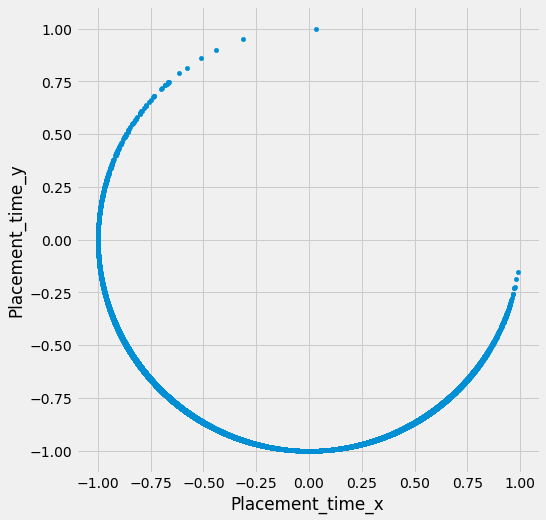

In [31]:
train_data.plot.scatter('Placement_time_x', 'Placement_time_y').set_aspect('equal');

In [32]:
#create feature speed
train_data['speed'] = train_data['Distance (KM)'] / train_data['Time from Pickup to Arrival']
train_data.head().T

,0,1,2,3,4
Order No,Order_No_4211,Order_No_27440,Order_No_14170,Order_No_21727,Order_No_8301
User Id,User_Id_633,User_Id_2642,User_Id_3339,User_Id_3523,User_Id_87
Vehicle Type,Bike,Bike,Bike,Bike,Bike
Platform Type,3,3,3,3,2
Personal or Business,Business,Personal,Business,Personal,Personal
Placement - Day of Month,9,18,31,2,22
Placement - Weekday (Mo = 1),5,5,5,2,2
Confirmation - Day of Month,9,18,31,2,22
Confirmation - Weekday (Mo = 1),5,5,5,2,2
Arrival at Pickup - Day of Month,9,18,31,2,22


Drop columns that are unique identifier, as we do not need them.
Drop Vehicle type because we only have one type of vehicle.

In [33]:
train_data.drop(['Order No', 'User Id', 'Vehicle Type', 'Rider Id'], axis = 1, inplace = True)
test_data.drop(['Order No', 'User Id', 'Vehicle Type', 'Rider Id'], axis = 1, inplace = True)

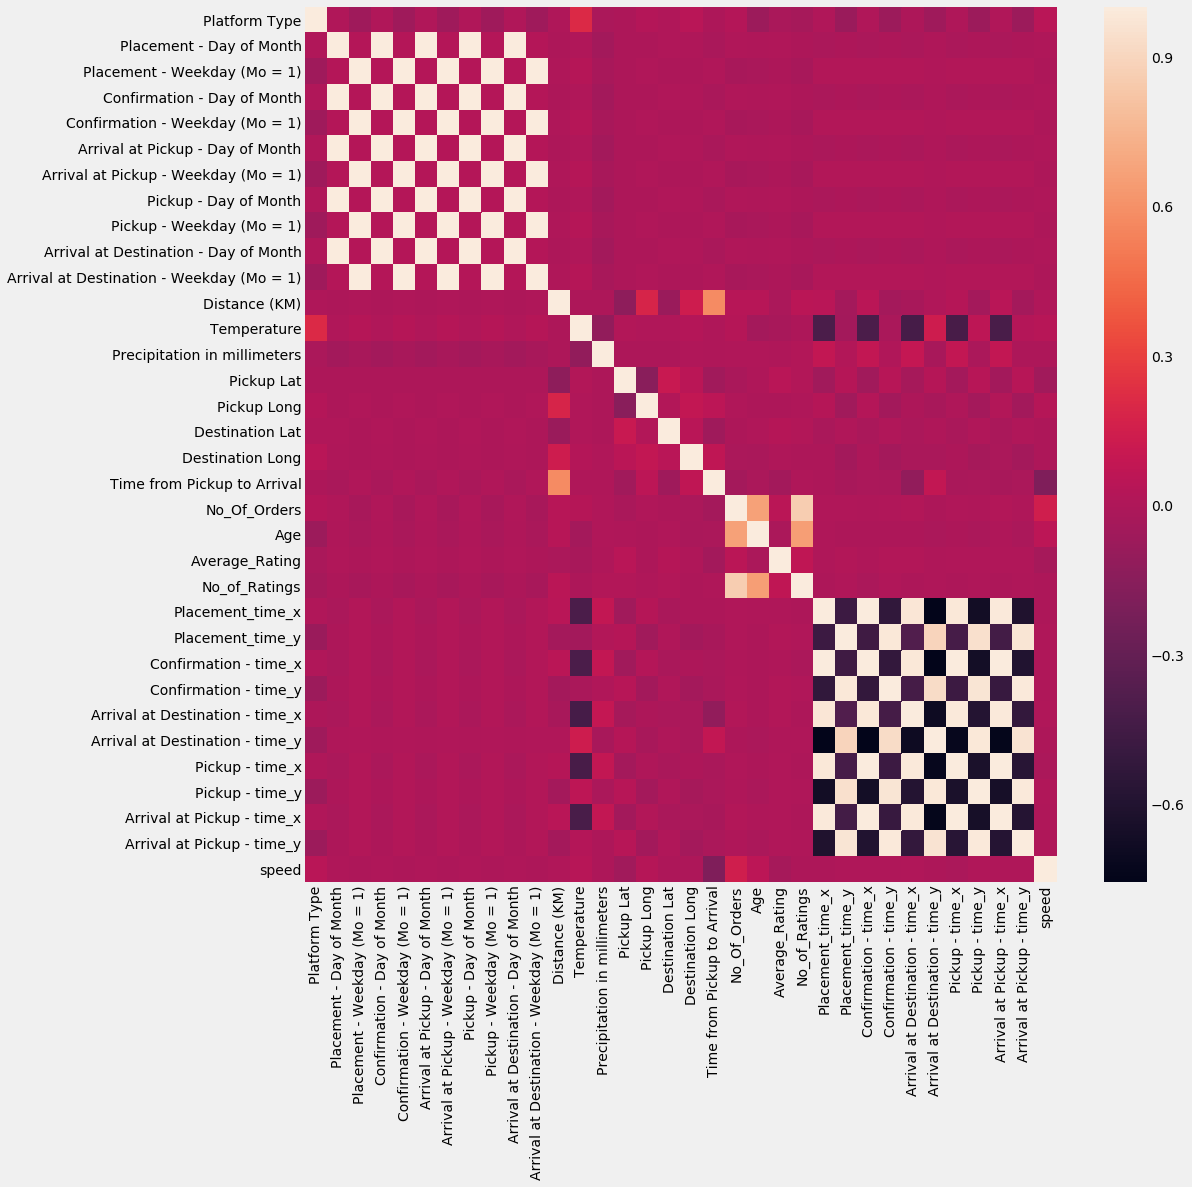

In [34]:
#get correlated values
plt.figure(figsize = (15,15))
sns.heatmap(train_data.corr())

We use a logic test with a significance value of 5%

In [35]:
corrs = train_data.corr()['Time from Pickup to Arrival'].sort_values(ascending=False)

In [36]:
from scipy.stats import pearsonr

# Build a dictionary of correlation coefficients and p-values
dict_cp = {}

column_titles = [col for col in corrs.index if col!= 'Time from Pickup to Arrival']
for col in column_titles:
    p_val = round(pearsonr(train_data[col], train_data['Time from Pickup to Arrival'])[1],6)
    dict_cp[col] = {'Correlation_Coefficient':corrs[col],
                    'P_Value':p_val}
    
df_cp = pd.DataFrame(dict_cp).T
df_cp_sorted = df_cp.sort_values('P_Value')
df_cp_sorted[df_cp_sorted['P_Value']<0.5]

,Correlation_Coefficient,P_Value
Distance (KM),0.580608,0.000000
Destination Lat,-0.061872,0.000000
Pickup Lat,-0.053823,0.000000
Average_Rating,-0.042559,0.000000
No_Of_Orders,-0.041608,0.000000
Arrival at Destination - time_x,-0.116724,0.000000
speed,-0.188162,0.000000
Arrival at Destination - time_y,0.083636,0.000000
Destination Long,0.070425,0.000000
Pickup Long,0.060285,0.000000


In [37]:
# The dependent variable remains the same:
y_name = 'Time from Pickup to Arrival'
y_data = train_data[y_name]  # y_name = 'Loan_Size'

# Model building - Independent Variable (IV) DataFrame
X_names = list(df_cp[df_cp['P_Value'] < 0.5].index)
X_data = train_data[X_names]

Predictor variables pairs which have a high correlation with each other

In [38]:
# Create the correlation matrix
corr = X_data.corr()

# Find rows and columnd where correlation coefficients > 0.9 or <-0.9
corr[np.abs(corr) > 0.9]

,Distance (KM),Arrival at Destination - time_y,Destination Long,Pickup Long,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Weekday (Mo = 1),Pickup - Weekday (Mo = 1),Arrival at Destination - Weekday (Mo = 1),Placement - Weekday (Mo = 1),Temperature,No_of_Ratings,Precipitation in millimeters,Placement_time_x,Age,Pickup - time_y,Arrival at Pickup - time_y,Confirmation - time_x,Confirmation - Day of Month,Arrival at Pickup - Day of Month,Pickup - Day of Month,Arrival at Destination - Day of Month,Placement - Day of Month,Pickup - time_x,Confirmation - time_y,Placement_time_y,Arrival at Pickup - time_x,No_Of_Orders,Average_Rating,Pickup Lat,Destination Lat,Arrival at Destination - time_x,speed
Distance (KM),1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arrival at Destination - time_y,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.980490,0.960854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.928085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination Long,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pickup Long,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Confirmation - Weekday (Mo = 1),NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,0.999952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arrival at Pickup - Weekday (Mo = 1),NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,0.999952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pickup - Weekday (Mo = 1),NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,0.999952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arrival at Destination - Weekday (Mo = 1),NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,0.999952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Placement - Weekday (Mo = 1),NaN,NaN,NaN,NaN,0.999952,0.999952,0.999952,0.999952,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
#Change column from object type to integer, 0 and 1
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_data['Personal or Business'] = le.fit_transform(train_data['Personal or Business'])
test_data['Personal or Business'] = le.transform(test_data['Personal or Business'])

In [40]:
#Change Platform type from intergers to categories
train_data['Platform Type'] = train_data['Platform Type'].replace([1, 2, 3, 4], ['Type_1', 'Type_2', 'Type_3', 'Type_4'])
test_data['Platform Type'] = test_data['Platform Type'].replace([1, 2, 3, 4], ['Type_1', 'Type_2', 'Type_3', 'Type_4'])

In [41]:
#Create dummy variables
traindata = pd.get_dummies(train_data, drop_first=True)
testdata = pd.get_dummies(test_data, drop_first=True)

In [42]:
traindata.head()

,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Placement_time_x,Placement_time_y,Confirmation - time_x,Confirmation - time_y,Arrival at Destination - time_x,Arrival at Destination - time_y,Pickup - time_x,Pickup - time_y,Arrival at Pickup - time_x,Arrival at Pickup - time_y,speed,Platform Type_Type_2,Platform Type_Type_3,Platform Type_Type_4
0,0,9,5,9,5,9,5,9,5,9,5,4,20.4,0.0,-1.317755,36.830370,-1.300406,36.829741,745,1637,1309,13.8,549,0.588609,-0.808418,0.572981,-0.819569,0.342362,-0.939568,0.392738,-0.919650,0.481817,-0.876272,0.005369,0,1,0
1,1,18,5,18,5,18,5,18,5,18,5,20,24.5,0.0,-1.326774,36.787807,-1.356237,36.904295,2886,1637,1309,13.8,549,-0.822351,-0.568981,-0.822889,-0.568203,-0.967837,-0.251577,-0.894187,-0.447694,-0.881441,-0.472294,0.006930,0,1,0
2,0,31,5,31,5,31,5,31,5,31,5,6,24.7,0.0,-1.255189,36.782203,-1.273412,36.818206,2615,1637,1309,13.8,549,-0.223605,-0.974680,-0.312404,-0.949949,-0.561783,-0.827285,-0.395278,-0.918561,-0.342157,-0.939643,0.002294,0,1,0
3,1,2,2,2,2,2,2,2,2,2,2,18,15.2,0.0,-1.290315,36.757377,-1.223520,36.802061,2986,1637,1309,13.8,549,0.950832,-0.309709,0.950403,-0.311022,0.797233,-0.603672,0.908569,-0.417735,0.914607,-0.404344,0.006028,0,1,0
4,1,22,2,22,2,22,2,22,2,22,2,7,19.2,0.0,-1.273524,36.799220,-1.300431,36.752427,1602,1637,1309,13.8,549,0.338054,-0.941127,0.332161,-0.943223,0.146227,-0.989251,0.260224,-0.965548,0.275637,-0.961262,0.004370,1,0,0


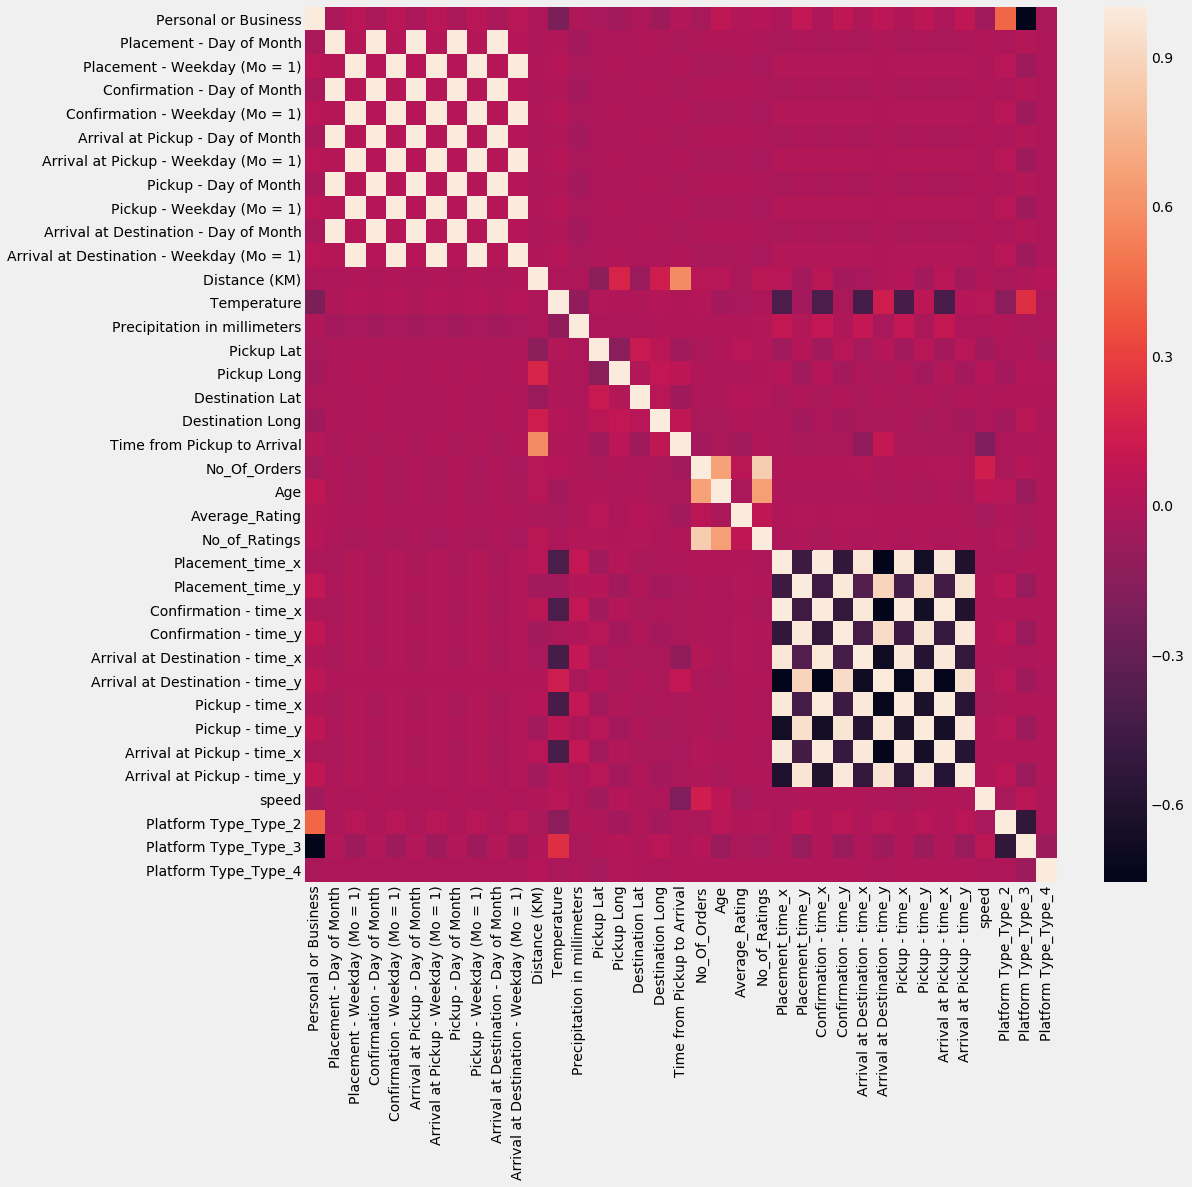

In [43]:
#get correlated values
plt.figure(figsize = (15,15))
sns.heatmap(traindata.corr())

In [44]:
#No of ratings and No of orders are highly correlated, so we drop one
traindata.drop('No_of_Ratings', axis=1, inplace=True)
testdata.drop('No_of_Ratings', axis=1, inplace=True)

In [45]:
#Arrival at pickup and pickup are highly correlated, drop one
traindata.drop(['Arrival at Pickup - time_x', 'Arrival at Pickup - time_y', 'Arrival at Pickup - Day of Month', 'Arrival at Pickup - Weekday (Mo = 1)'], axis=1, inplace=True)
testdata.drop(['Arrival at Pickup - time_x', 'Arrival at Pickup - time_y', 'Arrival at Pickup - Day of Month', 'Arrival at Pickup - Weekday (Mo = 1)'], axis=1, inplace=True)

In [46]:
#Orders are all delivered on the same day they were ordered, which creates a repitition, e.g Placement - day of month, Confirmation - day of month, Arrival at pickup - day of month, pickup - day of month, arrival at destination - day of month, all have the same data. This also applies to Weekday columns
traindata.drop(['Placement - Day of Month', 'Pickup - Day of Month', 'Arrival at Destination - Day of Month', 'Placement - Weekday (Mo = 1)', 'Pickup - Weekday (Mo = 1)', 'Arrival at Destination - Weekday (Mo = 1)'], axis=1, inplace=True)
testdata.drop(['Placement - Day of Month', 'Pickup - Day of Month', 'Placement - Weekday (Mo = 1)', 'Pickup - Weekday (Mo = 1)'], axis=1, inplace=True)

In [47]:
column_titles = [col for col in traindata.columns if col!= 'Time from Pickup to Arrival'] + ['Time from Pickup to Arrival']
traindata=traindata.reindex(columns=column_titles)

In [48]:
traindata.shape

(21201, 26)

In [49]:
testdata.shape

(7068, 22)

In [50]:
traindata.head()

,Personal or Business,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,No_Of_Orders,Age,Average_Rating,Placement_time_x,Placement_time_y,Confirmation - time_x,Confirmation - time_y,Arrival at Destination - time_x,Arrival at Destination - time_y,Pickup - time_x,Pickup - time_y,speed,Platform Type_Type_2,Platform Type_Type_3,Platform Type_Type_4,Time from Pickup to Arrival
0,0,9,5,4,20.4,0.0,-1.317755,36.830370,-1.300406,36.829741,1637,1309,13.8,0.588609,-0.808418,0.572981,-0.819569,0.342362,-0.939568,0.392738,-0.919650,0.005369,0,1,0,745
1,1,18,5,20,24.5,0.0,-1.326774,36.787807,-1.356237,36.904295,1637,1309,13.8,-0.822351,-0.568981,-0.822889,-0.568203,-0.967837,-0.251577,-0.894187,-0.447694,0.006930,0,1,0,2886
2,0,31,5,6,24.7,0.0,-1.255189,36.782203,-1.273412,36.818206,1637,1309,13.8,-0.223605,-0.974680,-0.312404,-0.949949,-0.561783,-0.827285,-0.395278,-0.918561,0.002294,0,1,0,2615
3,1,2,2,18,15.2,0.0,-1.290315,36.757377,-1.223520,36.802061,1637,1309,13.8,0.950832,-0.309709,0.950403,-0.311022,0.797233,-0.603672,0.908569,-0.417735,0.006028,0,1,0,2986
4,1,22,2,7,19.2,0.0,-1.273524,36.799220,-1.300431,36.752427,1637,1309,13.8,0.338054,-0.941127,0.332161,-0.943223,0.146227,-0.989251,0.260224,-0.965548,0.004370,1,0,0,1602


In [51]:
testdata.head()

,Personal or Business,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,No_Of_Orders,Age,Average_Rating,Placement_time_x,Placement_time_y,Confirmation - time_x,Confirmation - time_y,Pickup - time_x,Pickup - time_y,Platform Type_Type_2,Platform Type_Type_3,Platform Type_Type_4
0,0,27,3,8,23.258889,0.0,-1.333275,36.870815,-1.305249,36.822390,439,1511,13.3,0.588609,-0.808418,-0.946203,-0.323573,-0.973162,-0.230121,0,1,0
1,1,26,2,19,23.258889,0.0,-1.312745,36.875715,-1.288435,36.760677,439,1511,13.3,-0.822351,-0.568981,-0.666749,-0.745282,-0.759839,-0.650111,0,0,0
2,0,29,5,9,19.700000,0.0,-1.255189,36.782203,-1.293393,36.790237,439,1511,13.3,-0.223605,-0.974680,0.007854,-0.999969,-0.125766,-0.992060,0,1,0
3,0,2,1,15,16.400000,0.0,-1.310451,36.868724,-1.259542,36.787118,439,1511,13.3,0.950832,-0.309709,0.630224,-0.776413,0.479011,-0.877809,0,1,0
4,0,14,4,15,21.300000,0.0,-1.333275,36.870815,-1.255189,36.782203,439,1511,13.3,0.338054,-0.941127,-0.353203,-0.935547,-0.468765,-0.883323,0,1,0


In [52]:
#  Dropping columns that are in traindata but not in testdata
cols_dropped = [col for col in traindata.columns if col not in testdata.columns and col != 'Time from Pickup to Arrival']
traindata.drop(cols_dropped, axis=1, inplace=True)

In [53]:
# Splitting traindata into train and cross validation sets
X = traindata.iloc[:, :-1].values
y = traindata.iloc[:, -1].values
X_train, X_cross, y_train, y_cross = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Models

### Multiple Linear Regression

### Polynimial Regression

### Support Vector Regression

In [54]:
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)
vector_predict = regressor.predict(X_cross)
vector_mse = mean_squared_error(y_cross,vector_predict)
vector_r2 = r2_score(y_cross,vector_predict)
print('MSE for Support Vector :',vector_mse)
print('R Squared for Support Vector :',vector_r2)

C:\Users\maruf\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


MSE for Support Vector : 1001832.7239761295
R Squared for Support Vector : -0.032337307284454386


### Decision Tree Regression

In [54]:
tree_reg = DecisionTreeRegressor(random_state = 0)
tree_reg.fit(X_train, y_train)
tree_pred = tree_reg.predict(X_cross)
tree_mse = mean_squared_error(y_cross,tree_pred)
tree_r2 = r2_score(y_cross,tree_pred)
print('MSE for Decision Tree :',tree_mse)
print('R Squared for Decision Tree :',tree_r2)

MSE for Decision Tree : 1280001.9707616128
R Squared for Decision Tree : -0.318976468017951


### Random Forest Regression

In [22]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [23]:
y_pred = regressor.predict(X_cross)

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
forest_mse = mean_squared_error(y_cross,y_pred)
forest_r2 = r2_score(y_cross,y_pred)
forest_rmse = sqrt(forest_mse)
print('MSE for Random Forest :',forest_mse)
print('R Squared for Random Forest :',forest_r2)
print('RMSE for Random Forest :',forest_rmse)

MSE for Random Forest : 655224.2407309596
R Squared for Random Forest : 0.32482498110151903
RMSE for Random Forest : 809.4592273431439
